# 필요한 모듈 import

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

%matplotlib inline
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'NanumGothic'

# 데이터 (FinanceDataReader)

In [3]:
import FinanceDataReader as fdr

In [4]:
# 남양(003920) 전체 주가 데이터
ny = fdr.DataReader('003920')

In [5]:
ny.tail()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2021-11-01,444000,449000,425500,436500,9925,-0.043812
2021-11-02,434500,470000,430500,455500,8740,0.043528
2021-11-03,454500,465500,454500,455000,3332,-0.001098
2021-11-04,451000,459000,436500,442500,4457,-0.027473
2021-11-05,445000,445000,434500,439500,2279,-0.006780


# 주가데이터 가져오기

In [6]:
ny_CODE = '003920'
ony = fdr.DataReader(ny_CODE)
ny.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
1997-10-10,87000,87000,87000,87000,100,NaN
1997-10-11,93920,93920,93920,93920,20,0.079540
1997-10-13,92438,92438,92438,92437,0,-0.015790
1997-10-14,90955,95403,90955,95403,2000,0.032087
1997-10-15,94909,94909,94909,94909,0,-0.005178


In [7]:
ny.tail()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2021-11-01,444000,449000,425500,436500,9925,-0.043812
2021-11-02,434500,470000,430500,455500,8740,0.043528
2021-11-03,454500,465500,454500,455000,3332,-0.001098
2021-11-04,451000,459000,436500,442500,4457,-0.027473
2021-11-05,445000,445000,434500,439500,2279,-0.006780


In [8]:
ny.index

DatetimeIndex(['1997-10-10', '1997-10-11', '1997-10-13', '1997-10-14',
               '1997-10-15', '1997-10-16', '1997-10-17', '1997-10-18',
               '1997-10-20', '1997-10-21',
               ...
               '2021-10-25', '2021-10-26', '2021-10-27', '2021-10-28',
               '2021-10-29', '2021-11-01', '2021-11-02', '2021-11-03',
               '2021-11-04', '2021-11-05'],
              dtype='datetime64[ns]', name='Date', length=6000, freq=None)

In [9]:
ny['Year'] = ny.index.year
ny['Month'] = ny.index.month
ny['Day'] = ny.index.day

In [10]:
ny.head()

,Open,High,Low,Close,Volume,Change,Year,Month,Day
Date,,,,,,,,,
1997-10-10,87000,87000,87000,87000,100,NaN,1997,10,10
1997-10-11,93920,93920,93920,93920,20,0.079540,1997,10,11
1997-10-13,92438,92438,92438,92437,0,-0.015790,1997,10,13
1997-10-14,90955,95403,90955,95403,2000,0.032087,1997,10,14
1997-10-15,94909,94909,94909,94909,0,-0.005178,1997,10,15


## 시각화

Text(0, 0.5, 'price')

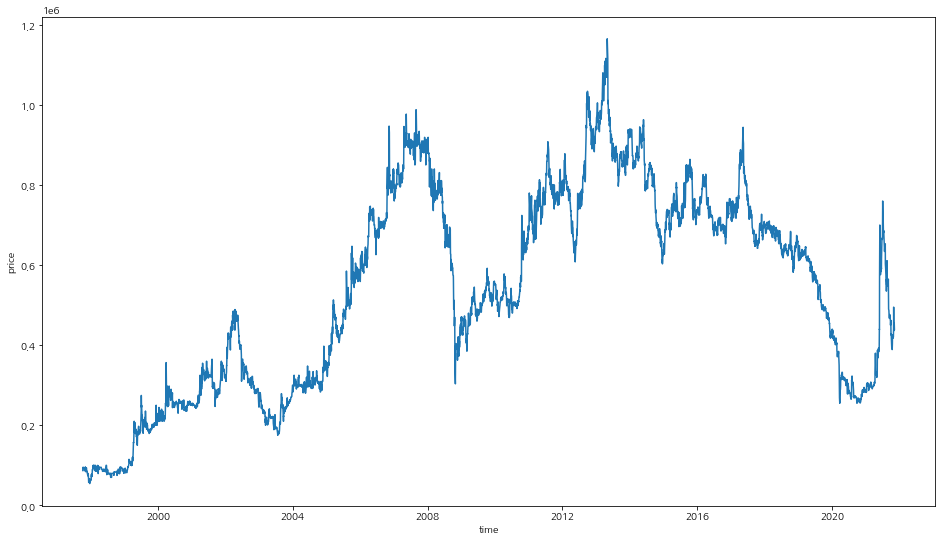

In [11]:
plt.figure(figsize=(16, 9))
sns.lineplot(y=ny['Close'], x=ny.index)
plt.xlabel('time')
plt.ylabel('price')

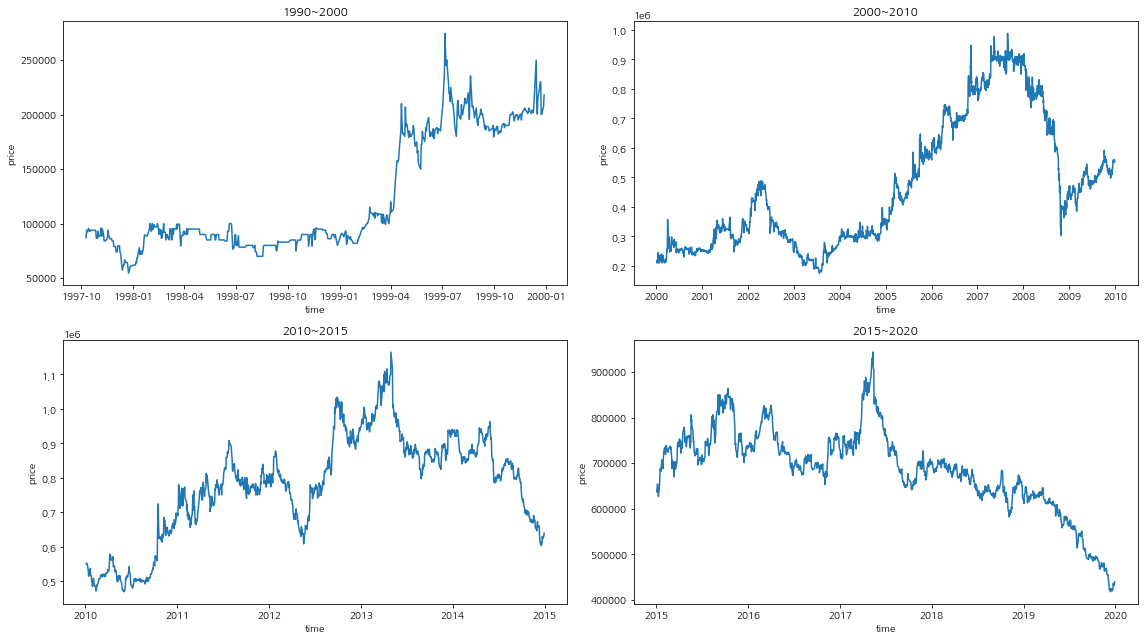

In [12]:
time_steps = [['1990', '2000'], 
              ['2000', '2010'], 
              ['2010', '2015'], 
              ['2015', '2020']]

fig, axes = plt.subplots(2, 2)
fig.set_size_inches(16, 9)
for i in range(4):
    ax = axes[i//2, i%2]
    df = ny.loc[(ny.index > time_steps[i][0]) & (ny.index < time_steps[i][1])]
    sns.lineplot(y=df['Close'], x=df.index, ax=ax)
    ax.set_title(f'{time_steps[i][0]}~{time_steps[i][1]}')
    ax.set_xlabel('time')
    ax.set_ylabel('price')
plt.tight_layout()
plt.show()

## 데이터 전처리

### 주가 데이터에 대하여 딥러닝 모델이 더 잘 학습할 수 있도록 정규화(Normalization)

MinMaxScaler를 해주면 전체 데이터는 0, 1사이의 값을 갖게된다.

In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
# 스케일을 적용할 column을 정의합니다.
scale_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
# 스케일 후 columns
scaled = scaler.fit_transform(ny[scale_cols])
scaled

array([[7.46781116e-02, 7.40425532e-02, 7.61821366e-02, 2.92896976e-02,
        4.24731251e-04],
       [8.06180258e-02, 7.99319149e-02, 8.22416813e-02, 3.55209734e-02,
        8.49462503e-05],
       [7.93459227e-02, 7.86706383e-02, 8.09439580e-02, 3.41855714e-02,
        0.00000000e+00],
       ...,
       [3.90128755e-01, 3.96170213e-01, 3.97985989e-01, 3.60663901e-01,
        1.41520453e-02],
       [3.87124464e-01, 3.90638298e-01, 3.82224168e-01, 3.49407984e-01,
        1.89302719e-02],
       [3.81974249e-01, 3.78723404e-01, 3.80472855e-01, 3.46706564e-01,
        9.67962522e-03]])

In [14]:
df = pd.DataFrame(scaled, columns=scale_cols)

In [15]:
df

,Open,High,Low,Close,Volume
0,0.074678,0.074043,0.076182,0.029290,0.000425
1,0.080618,0.079932,0.082242,0.035521,0.000085
2,0.079346,0.078671,0.080944,0.034186,0.000000
3,0.078073,0.081194,0.079645,0.036856,0.008495
4,0.081467,0.080774,0.083108,0.036412,0.000000
...,...,...,...,...,...
5995,0.381116,0.382128,0.372592,0.344005,0.042155
5996,0.372961,0.400000,0.376970,0.361114,0.037122
5997,0.390129,0.396170,0.397986,0.360664,0.014152
5998,0.387124,0.390638,0.382224,0.349408,0.018930


---

### train / test 분할

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.drop('Close', 1), df['Close'], test_size=0.2, random_state=0, shuffle=False)
x_train.shape, y_train.shape

((4800, 4), (4800,))

In [15]:
x_test.shape, y_test.shape

((1200, 4), (1200,))

In [16]:
x_train

,Open,High,Low,Volume
0,0.074678,0.074043,0.076182,0.000425
1,0.080618,0.079932,0.082242,0.000085
2,0.079346,0.078671,0.080944,0.000000
3,0.078073,0.081194,0.079645,0.008495
4,0.081467,0.080774,0.083108,0.000000
...,...,...,...,...
4795,0.638627,0.645106,0.651489,0.001215
4796,0.645494,0.644255,0.646235,0.001376
4797,0.651502,0.651064,0.653240,0.003908
4798,0.653219,0.653617,0.656743,0.002680


## TensroFlow Dataset을 활용한 시퀀스 데이터셋 구성

In [17]:
import tensorflow as tf

In [18]:
def windowed_dataset(series, window_size, batch_size, shuffle):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    if shuffle:
        ds = ds.shuffle(1000)
    ds = ds.map(lambda w: (w[:-1], w[-1]))
    return ds.batch(batch_size).prefetch(1)

### Hyperparameter 정의

* window_size : 내가 얼마동안(기간)의 주가 데이터에 기반하여 다음날 종가를 예측할 것인가를 정하는 parameter

In [19]:
WINDOW_SIZE=20 # 과거 20일을 기반으로 내일의 데이터를 예측한다라고 가정
BATCH_SIZE=32

In [20]:
# 학습용 데이터셋
train_data = windowed_dataset(y_train, WINDOW_SIZE, BATCH_SIZE, True)

# 검증용 데이터셋  
test_data = windowed_dataset(y_test, WINDOW_SIZE, BATCH_SIZE, False)

In [21]:
# 아래의 코드로 데이터셋의 구성을 확인해 볼 수 있습니다.
# X: (batch_size, window_size, feature)
# Y: (batch_size, feature)
for data in train_data.take(1):
    print(f'데이터셋(X) 구성(batch_size, window_size, feature갯수): {data[0].shape}')
    print(f'데이터셋(Y) 구성(batch_size, window_size, feature갯수): {data[1].shape}')

데이터셋(X) 구성(batch_size, window_size, feature갯수): (32, 20, 1)
데이터셋(Y) 구성(batch_size, window_size, feature갯수): (32, 1)


## LSTM(Long-Short Term Memory) 모델
* 순서가 중요한 feature의 요소일 때 흔히 적용하는 RNN(Recurrent Neural Network)의 한 종류
* RNN모델의 단점인 그레디언트 소실(Gradient Vanishing Problem)을 <br>해결하고자 메모리를 도입한 LSTM을 사용
*  또한 LSTM은 순환신경망에 메모리까지를 가지고 있어<br> 과거 시계열 데이터의 패턴 변화를 더 잘 잡아내는 특징을 가지고 있음

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D, Lambda
from tensorflow.keras.losses import Huber
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


model = Sequential([
    # 1차원 feature map 생성
    Conv1D(filters=32, kernel_size=5,
           padding="causal",
           activation="relu",
           input_shape=[WINDOW_SIZE, 1]),
    # LSTM
    LSTM(16, activation='tanh'),
    Dense(16, activation="relu"),
    Dense(1),
])

In [23]:
# Sequence 학습에 비교적 좋은 퍼포먼스를 내는 Huber()를 사용 
loss = Huber()
optimizer = Adam(0.0005)
model.compile(loss=Huber(), optimizer=optimizer, metrics=['mse'])

In [24]:
# earlystopping은 10번 epoch통안 val_loss 개선이 없다면 학습을 멈춘다.
earlystopping = EarlyStopping(monitor='val_loss', patience=10)
# val_loss 기준 체크포인터 생성
filename = os.path.join('tmp', 'ckeckpointer.ckpt')
checkpoint = ModelCheckpoint(filename, 
                             save_weights_only=True, 
                             save_best_only=True, 
                             monitor='val_loss', 
                             verbose=1)

In [25]:
history = model.fit(train_data, 
                    validation_data=(test_data), 
                    epochs=50, 
                    callbacks=[checkpoint, earlystopping])

Epoch 1/50
150/150 [==============================] - 4s 11ms/step - loss: 0.0011 - mse: 0.0021 - val_loss: 2.8376e-04 - val_mse: 5.6752e-04

Epoch 00001: val_loss improved from inf to 0.00028, saving model to tmp\ckeckpointer.ckpt
Epoch 2/50
150/150 [==============================] - 1s 7ms/step - loss: 2.4914e-04 - mse: 4.9828e-04 - val_loss: 2.5861e-04 - val_mse: 5.1723e-04

Epoch 00002: val_loss improved from 0.00028 to 0.00026, saving model to tmp\ckeckpointer.ckpt
Epoch 3/50
150/150 [==============================] - 1s 6ms/step - loss: 2.2917e-04 - mse: 4.5835e-04 - val_loss: 2.8526e-04 - val_mse: 5.7052e-04

Epoch 00003: val_loss did not improve from 0.00026
Epoch 4/50
150/150 [==============================] - 1s 6ms/step - loss: 2.2146e-04 - mse: 4.4293e-04 - val_loss: 2.7872e-04 - val_mse: 5.5743e-04

Epoch 00004: val_loss did not improve from 0.00026
Epoch 5/50
150/150 [==============================] - 1s 6ms/step - loss: 1.8946e-04 - mse: 3.7892e-04 - val_loss: 2.3202e-04

#### 저장한 ModelCheckpoint 를 로드

In [26]:
model.load_weights(filename)

#### test_data를 활용하여 예측을 진행

In [27]:
pred = model.predict(test_data)
pred.shape

(1180, 1)

#### 예측 데이터 시각화
아래 시각화 코드중 y_test 데이터에 [20:]으로 슬라이싱을 한 이유는
예측 데이터에서 20일치의 데이터로 21일치를 예측해야하기 때문에 test_data로 예측 시 앞의 20일은 예측하지 않습니다.
따라서, 20번 째 index와 비교하면 더욱 정확합니다.

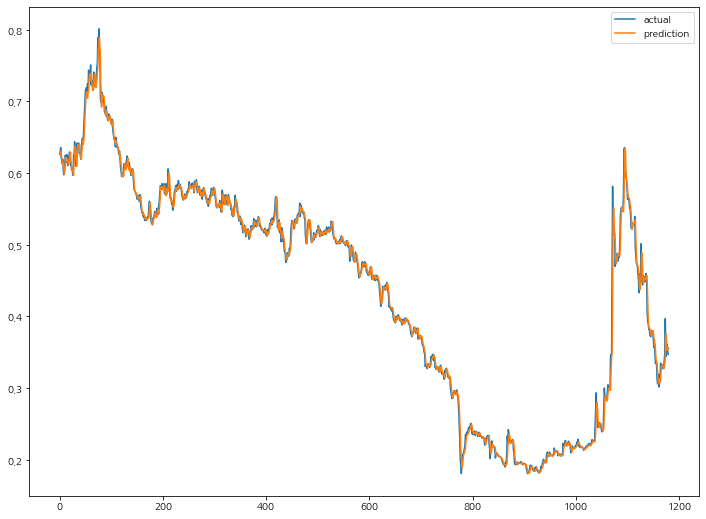

In [28]:
plt.figure(figsize=(12, 9))
plt.plot(np.asarray(y_test)[20:], label='actual')
plt.plot(pred, label='prediction')
plt.legend()
plt.show()

In [29]:
pd.DataFrame(pred)

,0
0,0.627148
1,0.630084
2,0.625203
3,0.627783
4,0.621087
...,...
1175,0.374822
1176,0.357529
1177,0.352418
1178,0.356420


In [30]:
pred

array([[0.6271484 ],
       [0.6300843 ],
       [0.62520295],
       ...,
       [0.35241786],
       [0.35641995],
       [0.3539462 ]], dtype=float32)

---

### 200일 이전의 데이터 학습
* TEST_SIZE = 200은 학습은 과거부터 200일 이전의 데이터를 학습하게 되고, <br>TEST를 위해서 이후 200일의 데이터로 모델이 주가를 예측하도록 한 다음, 실제 데이터와 오차가 얼마나 있는지 확인한다.
* 전처리 직후 데이터 분리 전단계의 데이터 사용

In [16]:
TEST_SIZE = 200

In [17]:
train = df[:-TEST_SIZE]
test = df[-TEST_SIZE:]

### dataset을 만들어 주는 함수
정해진 window_size에 기반하여 20일 기간의 데이터 셋을 묶어 주는 역할 <br>
순차적으로 20일 동안의 데이터 셋을 묶고, 이에 맞는 label (예측 데이터)와 함께 return

In [18]:
def make_dataset(data, label, window_size=20):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)

### feature 와 label 정의

In [19]:
feature_cols = ['Open', 'High', 'Low', 'Volume']
label_cols = ['Close']

train_feature = train[feature_cols]
train_label = train[label_cols]

test_feature = test[feature_cols]
test_label = test[label_cols]

# train dataset
train_feature, train_label = make_dataset(train_feature, train_label, 20)

# train, validation set 생성
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size=0.2)

x_train.shape, x_valid.shape
# ((6086, 20, 4), (1522, 20, 4))

# test dataset (실제 예측 해볼 데이터)
test_feature, test_label = make_dataset(test_feature, test_label, 20)
test_feature.shape, test_label.shape
# ((180, 20, 4), (180, 1))

((180, 20, 4), (180, 1))

## Keras를 활용한 LSTM 모델 생성

In [20]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LSTM

model = Sequential()
model.add(LSTM(16, 
               input_shape=(train_feature.shape[1], train_feature.shape[2]), 
               activation='relu', 
               return_sequences=False)
          )
model.add(Dense(1))

In [26]:
train_feature.shape

(5780, 20, 4)

In [23]:
train_feature.shape[2]

4

In [27]:
# earlystopping은 10번 epoch통안 val_loss 개선이 없다면 학습을 멈춘다,
earlystopping = EarlyStopping(monitor='val_loss', patience=10)
# val_loss 기준 체크포인터도 생성합니다.
filename = os.path.join('tmp', 'ckeckpointer.ckpt')
checkpoint = ModelCheckpoint(filename, 
                             save_weights_only=True, 
                             save_best_only=True, 
                             monitor='val_loss', 
                             verbose=1)

### 모델 학습

In [28]:
model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(x_train, y_train, 
                    epochs=200, 
                    batch_size=16,
                    validation_data=(x_valid, y_valid), 
                    callbacks=[earlystopping, checkpoint])

Epoch 1/200
289/289 [==============================] - 19s 7ms/step - loss: 0.0457 - val_loss: 3.2217e-04

Epoch 00001: val_loss improved from inf to 0.00032, saving model to tmp\ckeckpointer.ckpt
Epoch 2/200
289/289 [==============================] - 1s 3ms/step - loss: 2.9016e-04 - val_loss: 2.8856e-04

Epoch 00002: val_loss improved from 0.00032 to 0.00029, saving model to tmp\ckeckpointer.ckpt
Epoch 3/200
289/289 [==============================] - 1s 4ms/step - loss: 2.7921e-04 - val_loss: 2.8067e-04

Epoch 00003: val_loss improved from 0.00029 to 0.00028, saving model to tmp\ckeckpointer.ckpt
Epoch 4/200
289/289 [==============================] - 1s 3ms/step - loss: 2.4070e-04 - val_loss: 2.7231e-04

Epoch 00004: val_loss improved from 0.00028 to 0.00027, saving model to tmp\ckeckpointer.ckpt
Epoch 5/200
289/289 [==============================] - 1s 3ms/step - loss: 2.4538e-04 - val_loss: 2.5427e-04

Epoch 00005: val_loss improved from 0.00027 to 0.00025, saving model to tmp\ckeck

In [29]:
# weight 로딩
model.load_weights(filename)

# 예측
pred = model.predict(test_feature)

## 실제데이터와 예측한 데이터 시각화

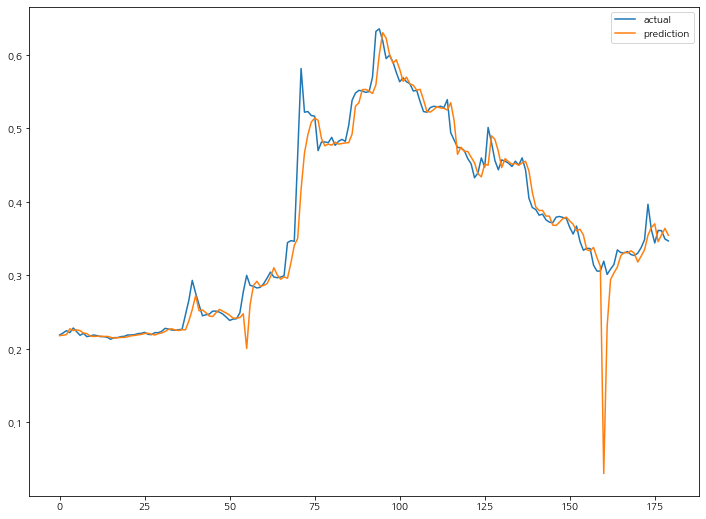

In [30]:
plt.figure(figsize=(12, 9))
plt.plot(test_label, label='actual')
plt.plot(pred, label='prediction')
plt.legend()
plt.show()

In [33]:
model.evaluate(x_valid,y_valid, batch_size=16)

73/73 [==============================] - 0s 2ms/step - loss: 1.4781e-04


0.0001478117919759825